<a href="https://colab.research.google.com/github/binnur/DataProcessing/blob/binnur%2Fcolab/Python/GP_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 4915DataProcessing/Scouting_GP.py
# Written in Pyhton 3
# Written by Darwin C

In [0]:
# Analysis imports
import pandas as pd
import numpy as np

# Graphing imports
import matplotlib.pyplot as plt

# Pretty colors imports
from itertools import cycle, islice

%matplotlib inline

In [0]:
# Matches for the remaining of Portland, as of 4/6 ~ Noon
MATCHES = [[2990,2906,997,3024,4915,4450],
               [4512,1425,4915,3674,6845,3218],
               [6845,4915,2928,3826,4469,3238],
               [4915,2521,6831,847,4450,2944],
               [1318,4512,6445,997,1778,4915],
               [488,1359,1425,3663,4915,6076],
               [4915,2930,2605,3223,4662,2471],
               [2930,2557,5803,4915,4125,847]]

# All matches for days 2 and 3 for portland

In [0]:
# copy dataset from github -- this is the url to the RAW data link
url = 'https://raw.githubusercontent.com/binnur/DataProcessing/binnur/colab/Data/Portland_Data.csv'

In [50]:
# Read CSV and test
raw_data = pd.read_csv(url, header=3, index_col=3, usecols=range(3,16), error_bad_lines=False)

raw_data.head()

,Team #,Auto + Tele,Tele Only,Auto Scale Cubes,Switch Cubes,Opponent Switch Cubes,Exchange Cubes,Scale Cubes,Switch Cubes.1,Opponent Switch Cubes.1,Exchange Cubes.1,Scale Cubes.1
Auto Switch Cubes,,,,,,,,,,,,
0.6,2811,9.9,9.0,0.3,0.3,0.9,5.2,2.6,3.0,3.0,9.0,6.0
0.6,4450,8.9,8.3,0.0,1.3,0.1,6.9,0.0,3.0,1.0,10.0,0.0
0.3,2976,8.2,7.9,0.0,5.5,NaN,0.1,2.3,10.0,NaN,1.0,6.0
0.8,2990,8.2,7.3,0.0,1.3,0.8,3.2,2.0,NaN,NaN,NaN,NaN
0.9,4061,8.1,7.2,0.0,1.0,4.8,1.4,0.0,8.0,8.0,3.0,0.0


In [0]:
# Deprecated, but used to turn % numbers into integers
def remove_percentage(s):
    if isinstance(s, str):
        return float(s.rstrip('%'))
    else:
        return 0

In [0]:
# Createing the table, indexed by team #, with 4 important data points.
data = raw_data.groupby(['Team #'])['Scale Cubes', 'Switch Cubes', 'Opponent Switch Cubes',
                                  'Exchange Cubes'].mean()

# SEE THOSE NaN, I DON'T EITHER
data.fillna(value=0,axis=1,inplace=True)

# Create another col, which is an addition of all the other cols
data['Total Cubes'] = data['Scale Cubes'] + data['Switch Cubes'] \
    + data['Opponent Switch Cubes'] + data['Exchange Cubes']

# Sort by the maximum number of cubes
data = data.sort_values(by='Total Cubes', ascending=False)

In [0]:
# - Test cell for printing things, debugging -

In [55]:
data.head()

,Scale Cubes,Switch Cubes,Opponent Switch Cubes,Exchange Cubes,Total Cubes
Team #,,,,,
2811,2.6,0.3,0.9,5.2,9.0
4450,0.0,1.3,0.1,6.9,8.3
2976,2.3,5.5,0.0,0.1,7.9
2990,2.0,1.3,0.8,3.2,7.3
2910,4.7,0.9,1.2,0.4,7.2


In [56]:
data.describe()

,Scale Cubes,Switch Cubes,Opponent Switch Cubes,Exchange Cubes,Total Cubes
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.801563,0.743750,0.476562,1.373437,4.395313
std,1.352657,0.830925,0.725005,1.290532,1.756297
min,0.000000,0.000000,0.000000,0.000000,1.200000
25%,0.775000,0.300000,0.000000,0.400000,3.175000
50%,1.800000,0.400000,0.300000,1.050000,4.300000
75%,2.600000,1.000000,0.625000,1.925000,5.550000
max,5.100000,5.500000,4.800000,6.900000,9.000000


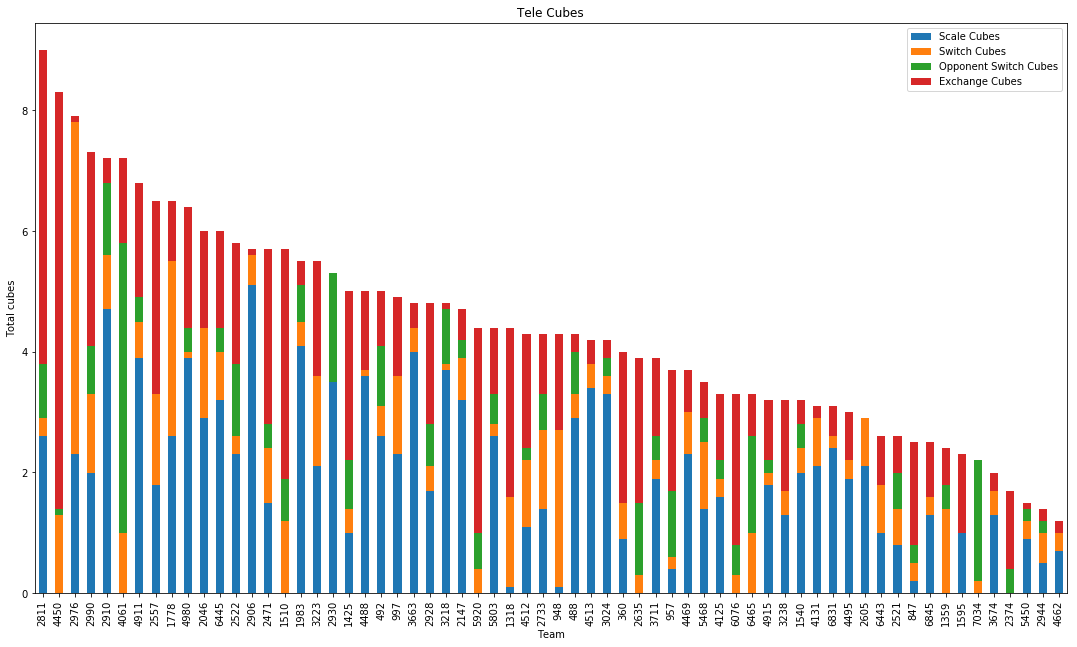

In [57]:
# Stacked table
plot1 = data[['Scale Cubes', 'Switch Cubes', 'Opponent Switch Cubes',
              'Exchange Cubes']].plot(kind='bar', stacked=True, title='Tele Cubes',figsize=(18.5, 10.5))

plot1.set_xlabel('Team')
plot1.set_ylabel('Total cubes');

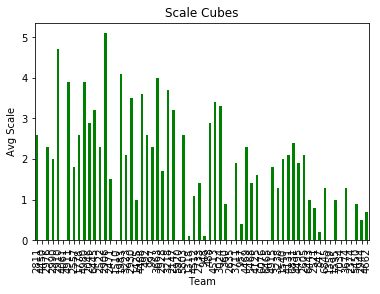

In [58]:
# Individual table

plot2 = data['Scale Cubes'].plot(kind='bar', stacked=True, title='Scale Cubes', color='green')
plot2.set_xlabel('Team')
plot2.set_ylabel('Avg Scale');

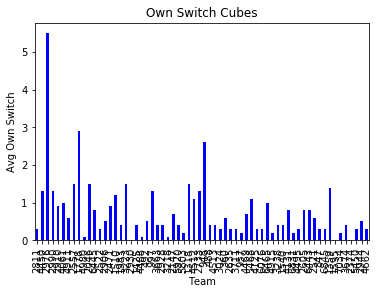

In [59]:
# Individual table
plot3 = data['Switch Cubes'].plot(kind='bar', stacked=True, title='Own Switch Cubes', color='blue')
plot3.set_xlabel('Team')
plot3.set_ylabel('Avg Own Switch');

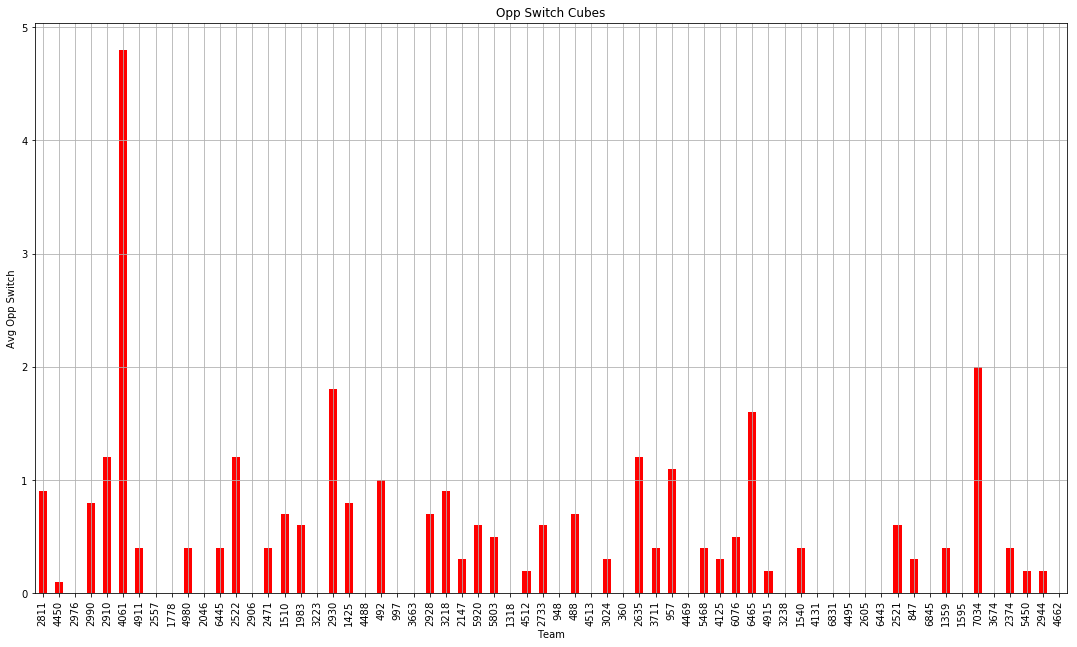

In [60]:
# First test of a larger table

plot4 = data['Opponent Switch Cubes'].plot(kind='bar', stacked=True, title='Opp Switch Cubes', color='red',grid=True,figsize=(18.5, 10.5))
plot4.set_xlabel('Team')
plot4.set_ylabel('Avg Opp Switch');

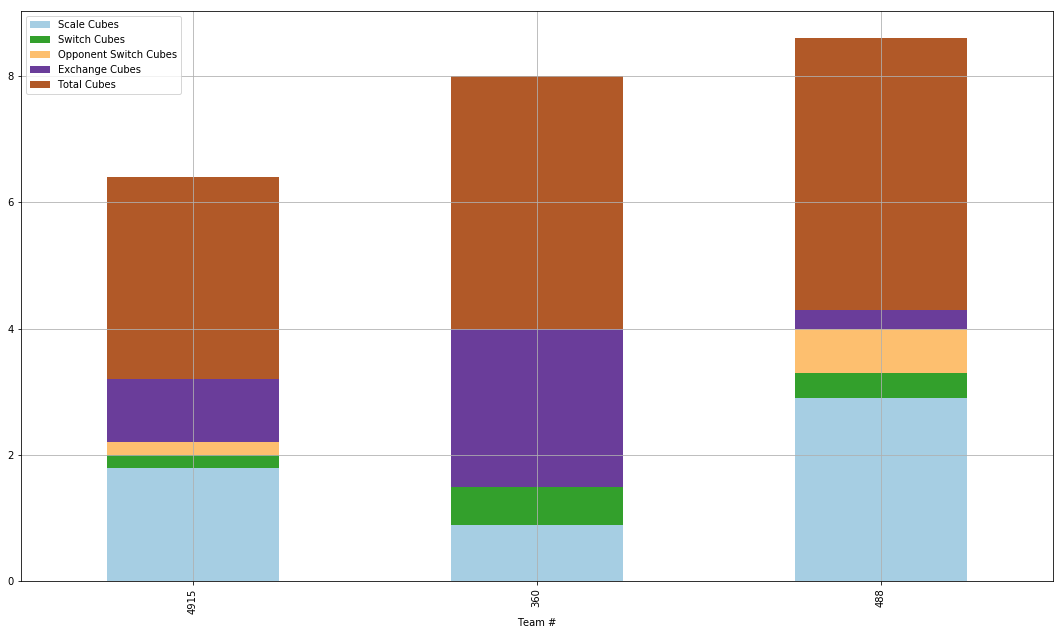

In [61]:
# Experementing with color slices in a stacked bar chart.

my_colors  = [(x/10.0, x/20.0, 0.75) for x in range(len(data))] # <-- Quick gradient example along the Red/Green dimensions.

plot5 = (data.loc[[4915,360,488]].plot(kind='bar',colormap='Paired',figsize=(18.5,10.5),grid=True,stacked=True))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


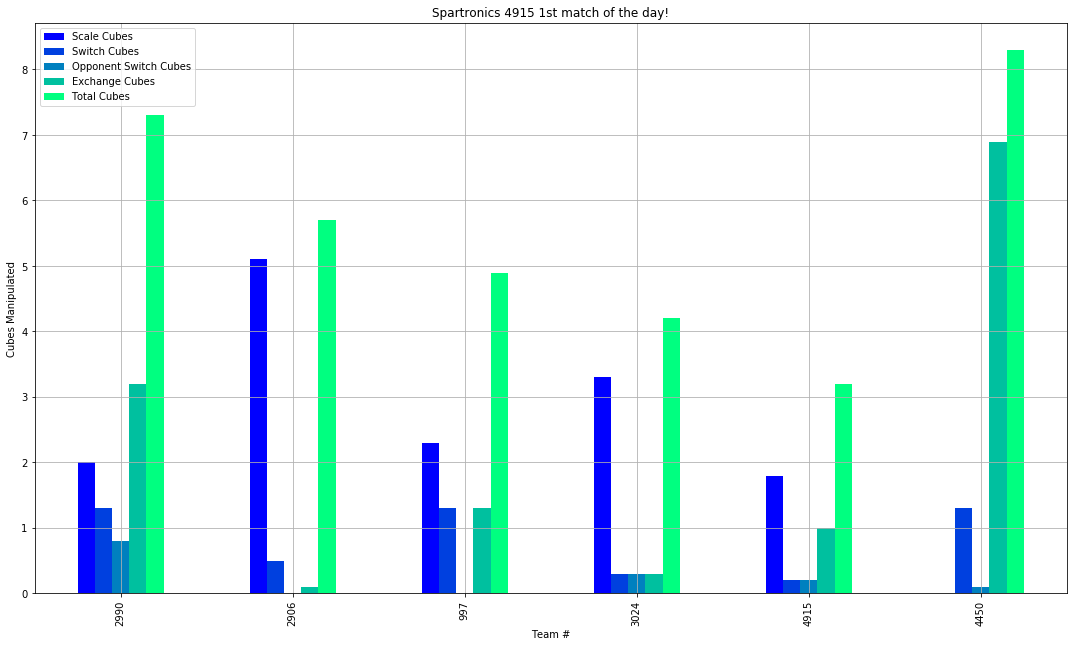

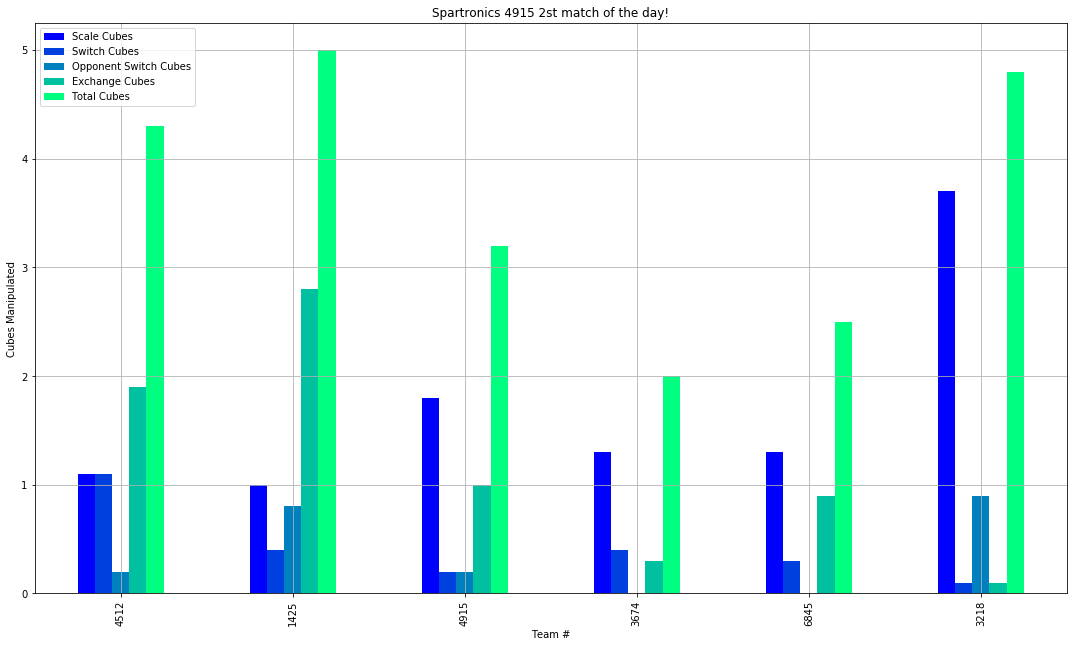

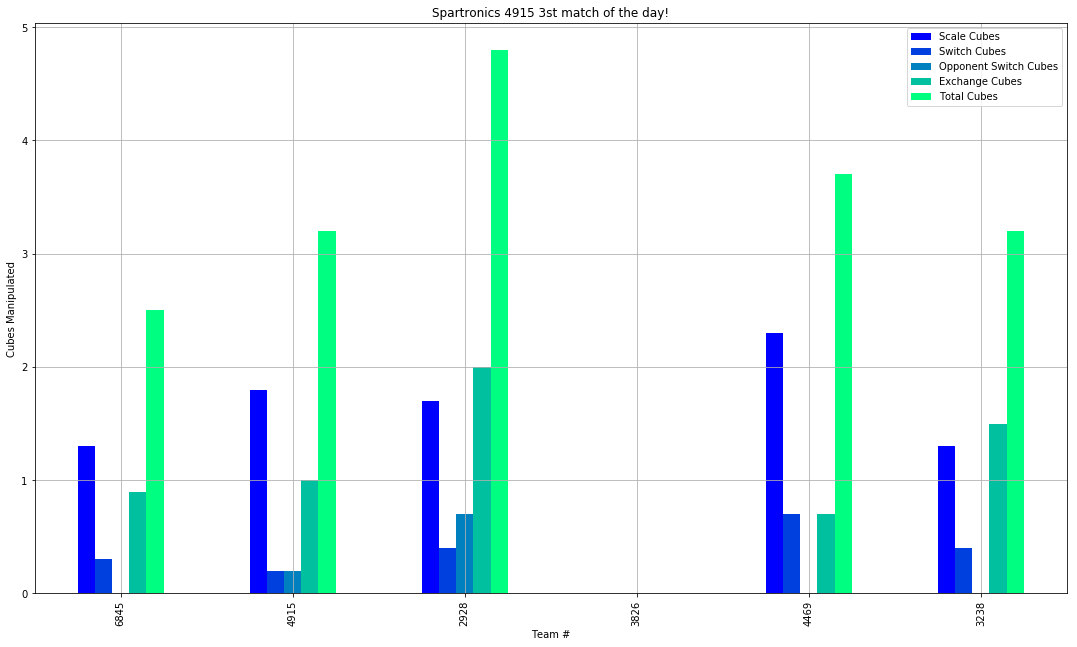

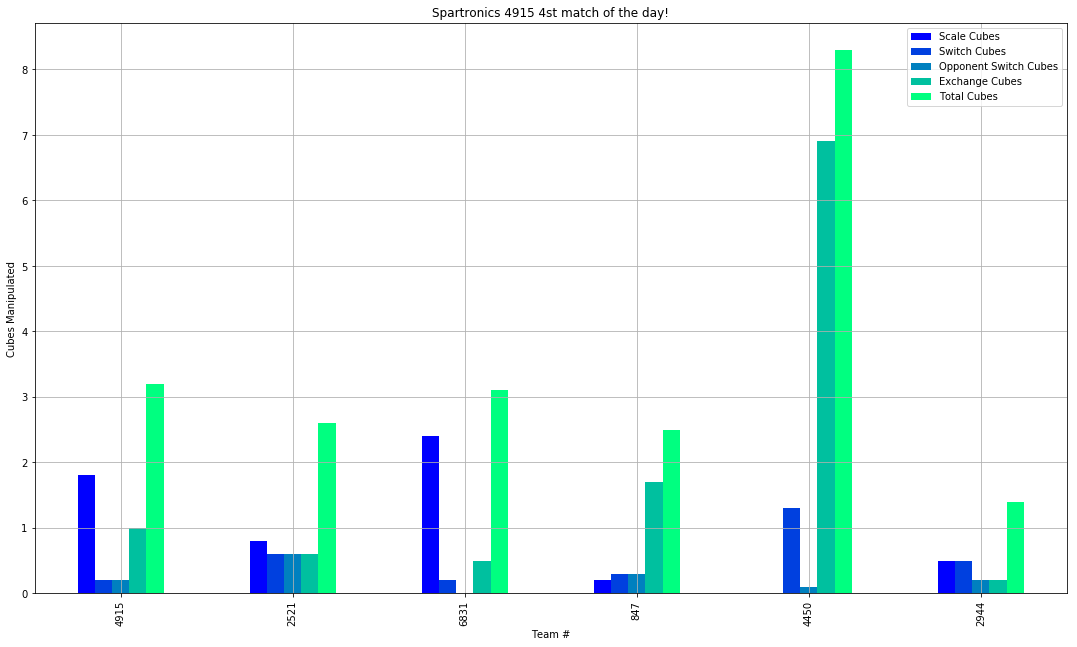

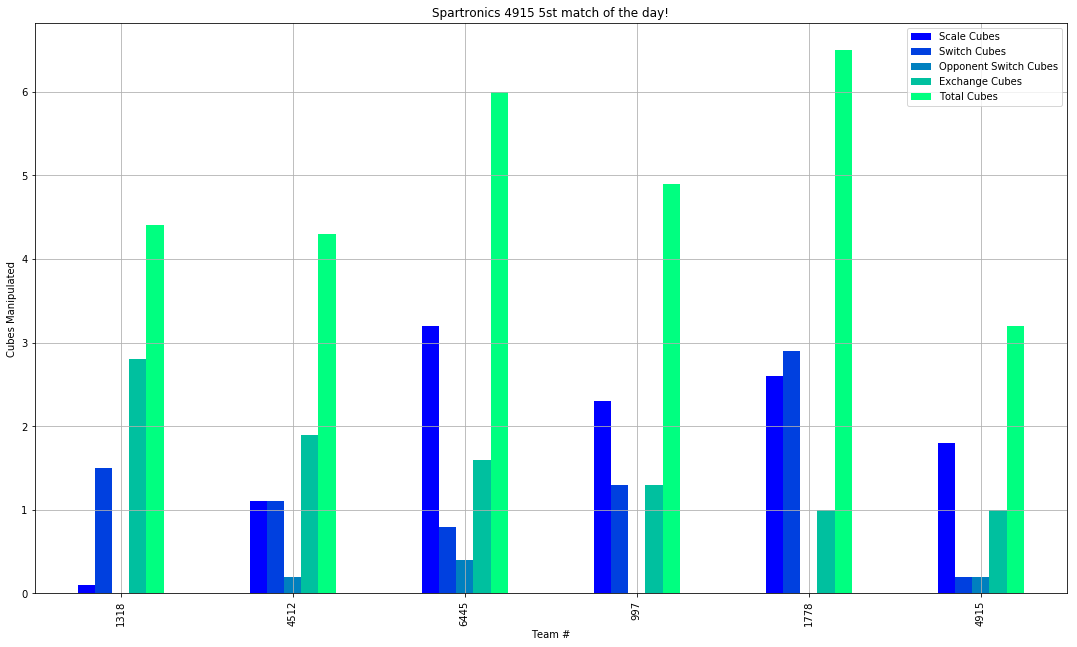

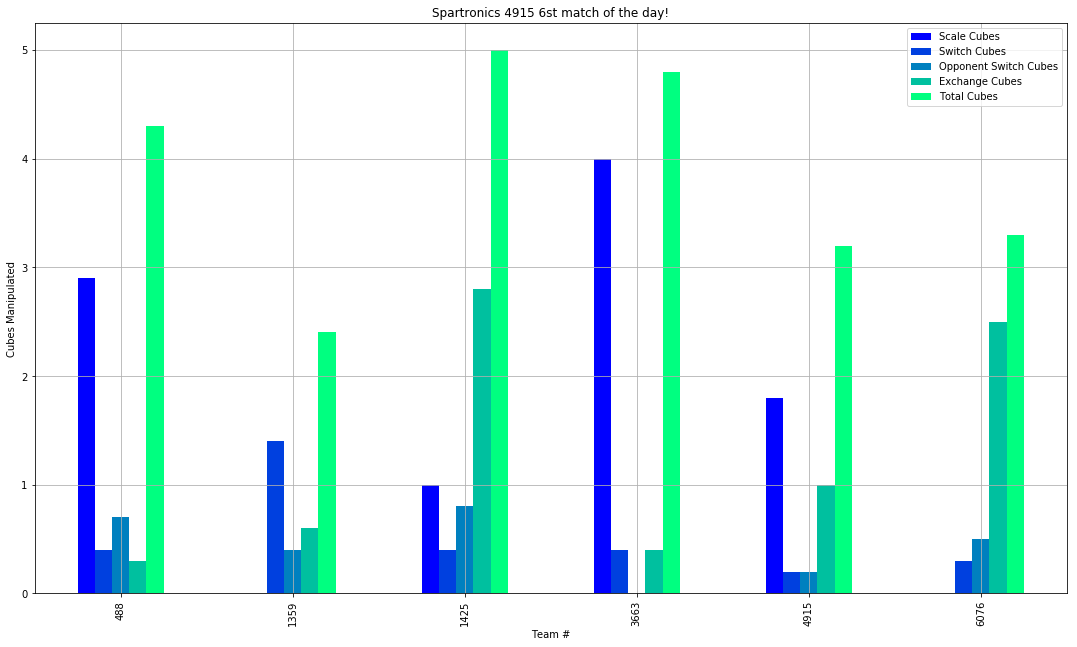

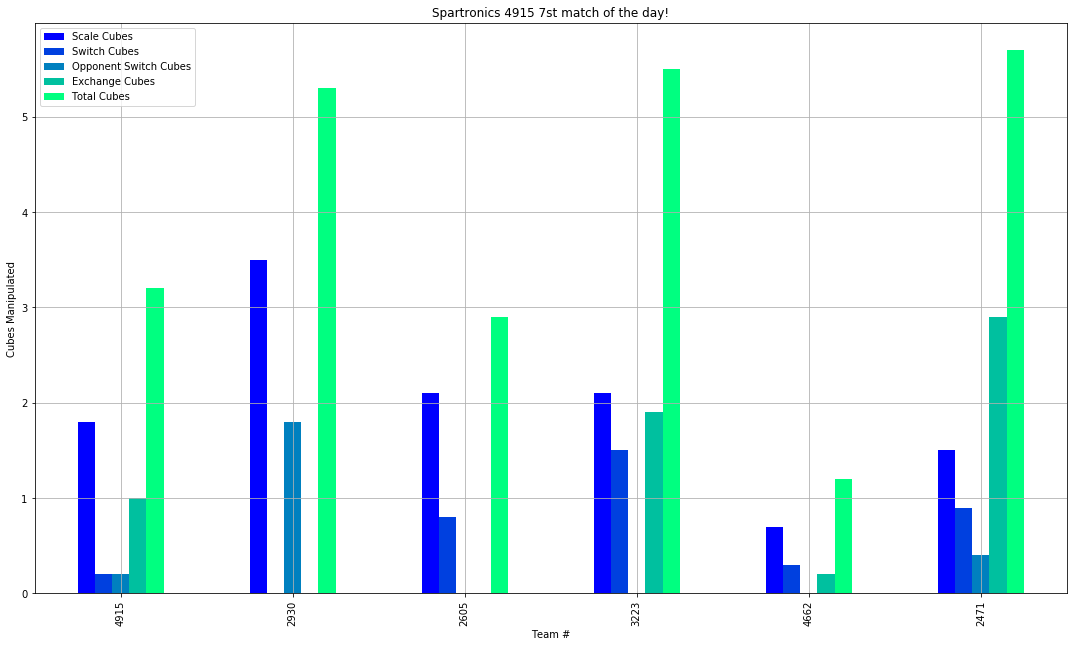

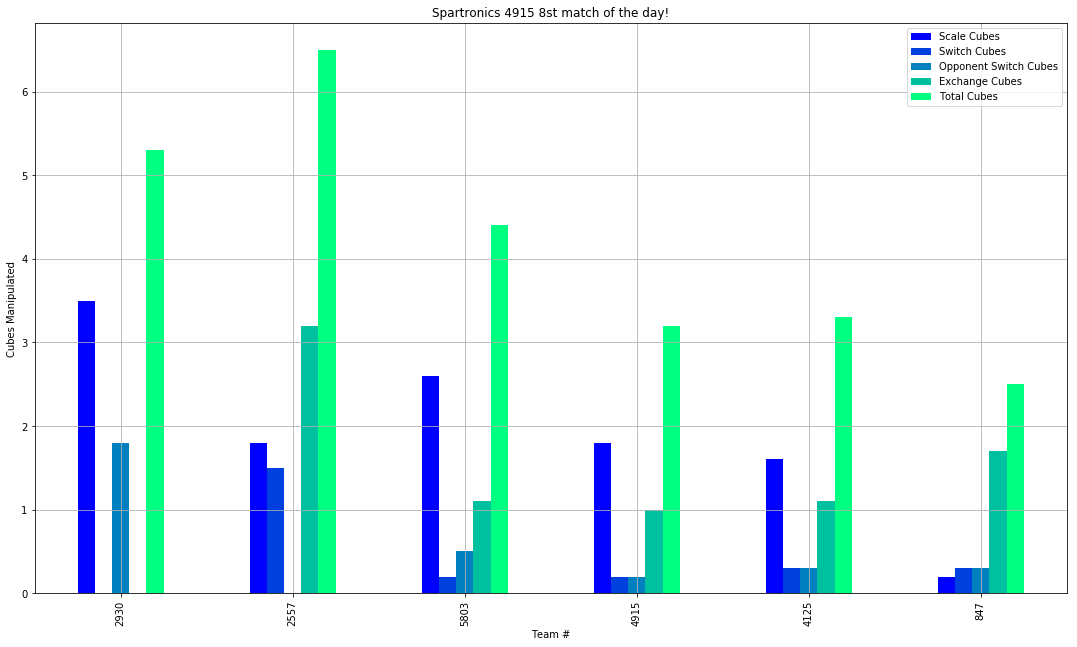

In [62]:
# pump out graphs for days 2 and 3

# Used to label the graph
matchcount = 0

for match in MATCHES:
    matchcount += 1

    graph = data.loc[match].plot(kind='bar',title="Spartronics 4915 " + str(matchcount) + "st match of the day!",figsize=(18.5,10.5),grid=True,colormap='winter')
    
    graph.set_ylabel('Cubes Manipulated');
    fig = graph.get_figure()
    fig.savefig(str("Graph number " + str(matchcount)))